<a href="https://colab.research.google.com/github/muhammadhafiz27/Heart-Disease-Predictions/blob/main/Tugas_Praktikum_4_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library dan Load Dataset serta Tampilkan 10 baris pertama data (bukan 5 seperti di modul).**

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/muhammadhafiz27/Heart-Disease-Predictions/refs/heads/main/heart.csv")
display(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# **Hitung jumlah & persentase data yang dihapus (7 data invalid → tampilkan % dari total data).**

In [2]:
# Calculate the number of invalid data points before deletion
invalid_data = len(df[(df['ca']==4) | (df['thal']==0)])
total_data = len(df)
percentage_invalid = (invalid_data / total_data) * 100

print(f"Jumlah data yang dihapus: {invalid_data}")
print(f"Persentase data yang dihapus: {percentage_invalid:.2f}% dari total data")

Jumlah data yang dihapus: 7
Persentase data yang dihapus: 2.31% dari total data


In [3]:
#Menampilkan data yang memiliki nilai tidak valid pada 'ca' atau 'thal'
print("Data dengan ca=4 atau thal=0: ")
print(df[(df['ca']==4) | (df['thal']==0)])

#Menghapus data tersebut
df = df[(df['ca'] != 4) & (df['thal'] != 0)]

#Mengecek jumlah data setelah pembersihan
print("\nJumlah data setelah pembersihan:", len(df))

Data dengan ca=4 atau thal=0: 
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0      115      0      0.0   
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   
281   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0  
281      1   0     0       0  

Jumlah data setelah pembersihan: 296


# **Simpan hasil preprocessing ke tiga file terpisah**

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Mendefinisikan fitur kategorikal dan numerik
# Berdasarkan interpretasi umum kolom dataset
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Memisahkan fitur (X) dan label (y)
X = df.drop('target', axis=1) # Fitur adalah semua kolom kecuali 'target'
y = df['target'] # Label adalah kolom 'target'

# Membuat pipeline preprocessing untuk fitur numerik dan kategorikal
# Transformer untuk fitur numerik: StandardScaler untuk scaling (standarisasi)
numerical_transformer = StandardScaler()
# Transformer untuk fitur kategorikal: OneHotEncoder untuk encoding
# handle_unknown='ignore' untuk menangani kategori yang tidak terlihat saat pelatihan
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Membuat Column Transformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features), # Terapkan numerical_transformer pada numerical_features
        ('cat', categorical_transformer, categorical_features) # Terapkan categorical_transformer pada categorical_features
    ],
    remainder='passthrough' # Biarkan kolom lain apa adanya (jika ada)
)

# Membuat pipeline preprocessing total
# Menggabungkan langkah preprocessor
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Menerapkan preprocessing pada fitur (X)
X_processed = preprocessing_pipeline.fit_transform(X)

# Output dari ColumnTransformer dengan OneHotEncoder adalah sparse matrix secara default.
# Ubah kembali menjadi dense array dan kemudian ke DataFrame untuk disimpan sebagai CSV.
# Perlu mendapatkan nama fitur setelah one-hot encoding

# Mendapatkan nama fitur numerik
num_feature_names = numerical_features

# Mendapatkan nama fitur kategorikal setelah one-hot encoding
# Ini memerlukan akses ke OneHotEncoder yang sudah di-fit di dalam ColumnTransformer
cat_transformer = preprocessor.named_transformers_['cat']
cat_feature_names = cat_transformer.get_feature_names_out(categorical_features)

# Menggabungkan semua nama fitur
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Mengubah array fitur yang telah diproses kembali menjadi DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Menyimpan dataset lengkap yang telah diproses (fitur + label)
# Perlu menggabungkan kembali fitur yang telah diproses dan label untuk dataset lengkap
heart_processed_df = X_processed_df.copy()
heart_processed_df['target'] = y.values # Selaraskan indeks dengan menggunakan .values

# Menyimpan dataset yang telah diproses ke file CSV
heart_processed_df.to_csv("heart_processed.csv", index=False)
X_processed_df.to_csv("X_heart.csv", index=False)
y.to_csv("y_heart.csv", index=False)


print("Encoding, Scaling, Pemisahan Fitur & Label, serta penyimpanan data telah selesai.")
print("Data berhasil disimpan ke heart_processed.csv, X_heart.csv, dan y_heart.csv")

Encoding, Scaling, Pemisahan Fitur & Label, serta penyimpanan data telah selesai.
Data berhasil disimpan ke heart_processed.csv, X_heart.csv, dan y_heart.csv


# **Setelah scaling, tampilkan min-max sebelum dan sesudah scaling**

In [5]:
import pandas as pd

# Asumsikan 'X' adalah DataFrame fitur sebelum scaling
# Asumsikan 'X_processed_df' adalah DataFrame fitur setelah scaling

print("Min-Max Fitur Numerik Sebelum Scaling:")
print(X[numerical_features].agg(['min', 'max']))

print("\nMin-Max Fitur Numerik Setelah Scaling (Kolom yang Sesuai):")
# Pilih kolom di X_processed_df yang merupakan hasil scaling dari fitur numerik asli
# Nama kolom setelah scaling akan sama dengan nama fitur numerik asli
print(X_processed_df[numerical_features].agg(['min', 'max']))

Min-Max Fitur Numerik Sebelum Scaling:
     age  trestbps  chol  thalach  oldpeak
min   29        94   126       71      0.0
max   77       200   564      202      6.2

Min-Max Fitur Numerik Setelah Scaling (Kolom yang Sesuai):
          age  trestbps      chol   thalach   oldpeak
min -2.822115 -2.124963 -2.334890 -3.425822 -0.909506
max  2.485180  3.864871  6.106183  2.286730  4.414657


# **Tambahkan visualisasi distribusi target dalam bentuk pie chart atau bar chart**

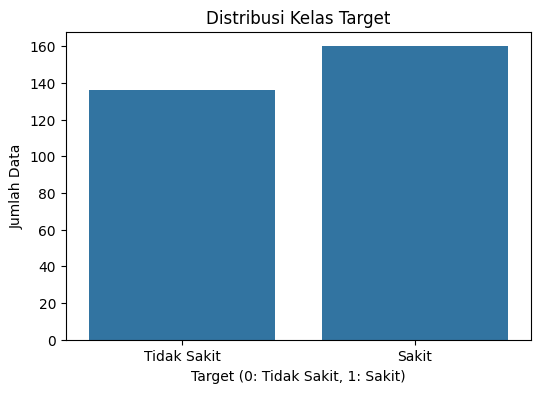

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing kelas target
target_counts = df['target'].value_counts()

# Buat bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0: Tidak Sakit, 1: Sakit)')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=[0, 1], labels=['Tidak Sakit', 'Sakit'])
plt.show()

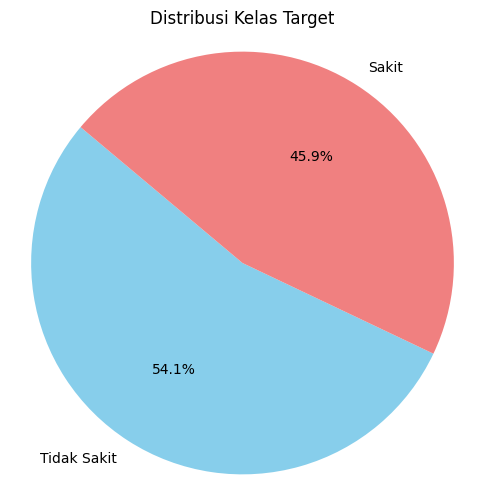

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung jumlah masing-masing kelas target
# Menggunakan DataFrame 'df' yang sudah dibersihkan
target_counts = df['target'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Tidak Sakit', 'Sakit'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Kelas Target')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()